In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
filenames = os.listdir('./')
filenames.sort()
print('files in the folder:')
for f in filenames:
    print('\t' + f)

imus_files = [f for f in filenames if 'imu' in f]
stim_files = [f for f in filenames if 'stim' in f]
pos_files = [f for f in filenames if 'pos' in f]
vidtime_files = [f for f in filenames if 'vidtime' in f]

old_imu_file = imus_files[0]
new_imu_file = imus_files[1]

old_stim_file = stim_files[0]
new_stim_file = stim_files[1]

old_pos_file = pos_files[0]
new_pos_file = pos_files[1]

old_vidtime_file = vidtime_files[0]
new_vidtime_file = vidtime_files[1]

files in the folder:
	.ipynb_checkpoints
	201910021623_imus_data.txt
	201910021623_pos_data.pos
	201910021623_stim_data.txt
	201910021623_tracking_data.mp4
	201910021623_video_data.mp4
	201910021623_vidtime_data.time
	compare.ipynb
	new_201910021623_imus_data.txt
	new_201910021623_pos_data.pos
	new_201910021623_stim_data.txt
	new_201910021623_vidtime_data.time


In [3]:
# seat_pos
old_seat_pos = pd.DataFrame(pd.read_csv('./' + old_pos_file , header=None)[0])
old_t_seat_pos = pd.read_csv('./' + old_vidtime_file, header=None)

new_seat_pos = pd.DataFrame(pd.read_csv('./' + new_pos_file , header=None)[0])
new_t_seat_pos = pd.read_csv('./' + new_vidtime_file, header=None)

# print(len(old_seat_pos))
# print(len(old_t_seat_pos))
# print(len(new_seat_pos))
# print(len(new_t_seat_pos))

In [4]:
old_seat_pos = old_seat_pos.drop(len(old_seat_pos)-1)
new_seat_pos = new_seat_pos.drop(len(new_seat_pos)-1)

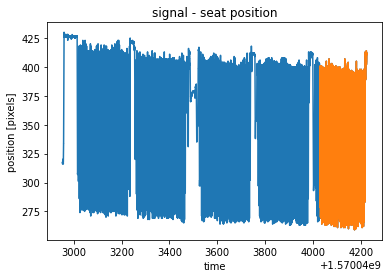

In [5]:
plt.figure()
plt.plot(old_t_seat_pos,old_seat_pos)
plt.plot(new_t_seat_pos, new_seat_pos)
plt.title('signal - seat position')
plt.ylabel('position [pixels]')
plt.xlabel('time')
plt.show()

In [6]:
df_old_stim = pd.read_csv(old_stim_file,header=None)
df_new_stim = pd.read_csv(new_stim_file,header=None)


In [7]:
old_stim_verbal = df_old_stim[2]
old_t_stim = df_old_stim[0]
old_stim_signal = []
for i, s in enumerate(old_stim_verbal):
    if 'extension' in s:
        old_stim_signal.append(1)
    elif 'stop' in s:
        old_stim_signal.append(0)
    elif 'flexion' in s:
        old_stim_signal.append(-1)
        



new_stim_verbal = df_new_stim[2]
new_t_stim = df_new_stim[0]
new_stim_signal = []
for i, s in enumerate(new_stim_verbal):
    if 'extension' in s:
        new_stim_signal.append(1)
    elif 'stop' in s:
        new_stim_signal.append(0)
    elif 'flexion' in s:
        new_stim_signal.append(-1)
        


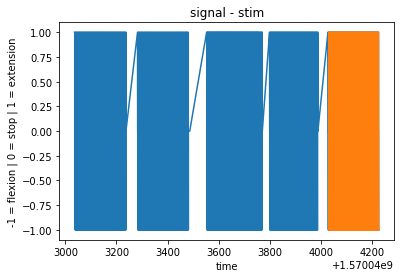

In [8]:
plt.figure()

plt.plot(old_t_stim,old_stim_signal)
plt.plot(new_t_stim,new_stim_signal)
plt.title("signal - stim")
plt.ylabel('-1 = flexion | 0 = stop | 1 = extension')
plt.xlabel("time")

plt.show()